In [3]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss, f1_score
from sklearn.metrics import f1_score, auc, roc_curve, plot_confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [97]:
# Loads the saved pickle file data: final, train, and test data

file = open('./Pickle Files/NetworkX_Pre-Processing_Data.pickle','rb')
final_df_nx_scaled = pickle.load(file)
X_train_nx = pickle.load(file)
X_test_nx = pickle.load(file)
y_train_nx = pickle.load(file)
y_test_nx = pickle.load(file)

file = open('./Pickle Files/Data_Wrangling_Data.pickle','rb')
_ = pickle.load(file)
G = pickle.load(file)

# NetworkX Link Prediction Algorithms Modeling Approach

# Logistic Regression Classifier

1. Uses GridSearchCV for hyperparameter tuning to pick best model version

In [60]:
lr = LogisticRegression(random_state = 0, max_iter = 1000)
param_grid = {'C': [0.01,0.1,1]}
gs_lr = GridSearchCV(lr, param_grid = param_grid, scoring = 'accuracy', cv = 3, n_jobs = -1)
gs_lr.fit(X_train_nx, y_train_nx)
lr = gs_lr.best_estimator_
print(lr)

LogisticRegression(C=1, max_iter=1000, random_state=0)


2. Fits model & makes predictions

In [61]:
y_pred_lr = lr.predict(X_test_nx)

3. Calculates Accuracy, Precision, Recall, F1 Score, Log-Loss, AUC-ROC

In [62]:
# Classification Report

print(classification_report(y_test_nx, y_pred_lr, zero_division = 0))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     17000
           1       0.91      0.87      0.89     16840

    accuracy                           0.89     33840
   macro avg       0.90      0.89      0.89     33840
weighted avg       0.90      0.89      0.89     33840



In [63]:
# Computes Accuracy, Precision, Recall, F1 Score, Log-Loss

accuracy, precision, recall, f1, logloss = [], [], [], [], []

accuracy.append(round(accuracy_score(y_test_nx, y_pred_lr),2))
precision.append(round(precision_score(y_test_nx, y_pred_lr, average = 'macro', zero_division = 0),2))
recall.append(round(recall_score(y_test_nx, y_pred_lr, average = 'macro'),2))
f1.append(round(f1_score(y_test_nx, y_pred_lr, average = 'macro'),2))
lr_probas = lr.predict_proba(X_test_nx)
logloss.append(round(log_loss(y_test_nx, lr_probas),2))

print('Accuracy: {}'.format(accuracy[-1]))
print('Precision: {}'.format(precision[-1]))
print('Recall: {}'.format(recall[-1])) 
print('F1-Score: {}'.format(f1[-1]))
print('Log Loss: {}'.format(logloss[-1]))

Accuracy: 0.89
Precision: 0.9
Recall: 0.89
F1-Score: 0.89
Log Loss: 0.31


In [64]:
# Computer AUC-ROC

fpr = dict()
tpr = dict() 
roc_auc = dict()
colors = ['blue', 'red', 'green', 'purple']

probs = lr.predict_proba(X_test_nx)[:,1]

fpr["Logistic Regression"], tpr["Logistic Regression"], _ = roc_curve(y_test_nx, probs)
roc_auc["Logistic Regression"] = auc(fpr["Logistic Regression"], tpr["Logistic Regression"])                           

print('Logistic Regression AUC-ROC {0:.2f}'.format(roc_auc['Logistic Regression']))

Logistic Regression AUC-ROC 0.95


4. Prints Confusion Matrix

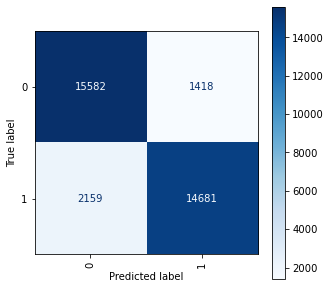

In [65]:
fig, ax = plt.subplots(figsize=(5, 5))
disp = plot_confusion_matrix(lr, X_test_nx, y_test_nx, cmap = plt.cm.Blues, ax = ax, xticks_rotation = 'vertical')
plt.show()

# Random Forest Classifier

1. Uses GridSearchCV for hyperparameter tuning to pick best model version

In [66]:
rf = RandomForestClassifier(random_state = 0)
param_grid = {'n_estimators': [100,300,500]}
gs_rf = GridSearchCV(rf, param_grid = param_grid, scoring = 'accuracy', cv = 3, n_jobs = -1)
gs_rf.fit(X_train_nx, y_train_nx)
rf = gs_rf.best_estimator_
print(rf)

RandomForestClassifier(n_estimators=500, random_state=0)


2. Fits model & makes predictions

In [67]:
y_pred_rf = rf.predict(X_test_nx)

3. Calculates Accuracy, Precision, Recall, F1 Score, Log-Loss, AUC-ROC

In [69]:
# Classification Report

print(classification_report(y_test_nx, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89     17000
           1       0.88      0.90      0.89     16840

    accuracy                           0.89     33840
   macro avg       0.89      0.89      0.89     33840
weighted avg       0.89      0.89      0.89     33840



In [70]:
# Computes Accuracy, Precision, Recall, F1 Score, Log-Loss

accuracy.append(round(accuracy_score(y_test_nx, y_pred_rf),2))
precision.append(round(precision_score(y_test_nx, y_pred_rf, average = 'macro'),2))
recall.append(round(recall_score(y_test_nx, y_pred_rf, average = 'macro'),2))
f1.append(round(f1_score(y_test_nx, y_pred_rf, average = 'macro'),2))
rf_probas = rf.predict_proba(X_test_nx)
logloss.append(round(log_loss(y_test_nx, rf_probas),2))

print('Accuracy: {}'.format(accuracy[-1]))
print('Precision: {}'.format(precision[-1]))
print('Recall: {}'.format(recall[-1])) 
print('F1-Score: {}'.format(f1[-1]))
print('Log Loss: {}'.format(logloss[-1]))

Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1-Score: 0.89
Log Loss: 0.39


In [71]:
# Computer AUC-ROC

rf_probs = rf.predict_proba(X_test_nx)[:,1]

fpr["Random Forest"], tpr["Random Forest"], _ = roc_curve(y_test_nx, rf_probs)
roc_auc["Random Forest"] = auc(fpr["Random Forest"], tpr["Random Forest"])                           

print('Random Forest ROC Curve Area {0:.2f}'.format(roc_auc['Random Forest']))

Random Forest ROC Curve Area 0.94


4. Prints Confusion Matrix

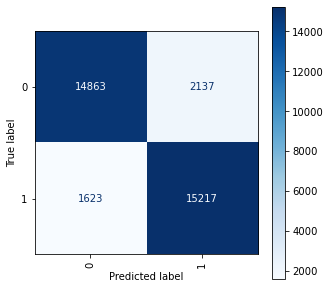

In [72]:
fig, ax = plt.subplots(figsize=(5, 5))
disp = plot_confusion_matrix(rf, X_test_nx, y_test_nx, cmap = plt.cm.Blues, ax = ax, xticks_rotation = 'vertical')
plt.show()

# Gradient Boosting Classifier

1. Uses GridSearchCV for hyperparameter tuning to pick best model version

In [73]:
gb = GradientBoostingClassifier(random_state = 0)
param_grid = {'learning_rate': [0.01,0.05,0.1]}
gs_gb = GridSearchCV(gb, param_grid = param_grid, scoring = 'accuracy', cv = 3, n_jobs = -1)
gs_gb.fit(X_train_nx, y_train_nx)
gb = gs_gb.best_estimator_
print(gb)

GradientBoostingClassifier(learning_rate=0.05, random_state=0)


2. Fits model & makes predictions

In [74]:
y_pred_gb = gb.predict(X_test_nx)

3. Calculates Accuracy, Precision, Recall, F1 Score, Log-Loss, AUC-ROC

In [75]:
# Classification Report

print(classification_report(y_test_nx, y_pred_gb))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     17000
           1       0.89      0.95      0.92     16840

    accuracy                           0.92     33840
   macro avg       0.92      0.92      0.92     33840
weighted avg       0.92      0.92      0.92     33840



In [76]:
# Computes Accuracy, Precision, Recall, F1 Score, Log-Loss

accuracy.append(round(accuracy_score(y_test_nx, y_pred_gb),2))
precision.append(round(precision_score(y_test_nx, y_pred_gb, average = 'macro'),2))
recall.append(round(recall_score(y_test_nx, y_pred_gb, average = 'macro'),2))
f1.append(round(f1_score(y_test_nx, y_pred_gb, average = 'macro'),2))
gb_probas = gb.predict_proba(X_test_nx)
logloss.append(round(log_loss(y_test_nx, gb_probas),2))

print('Accuracy: {}'.format(accuracy[-1]))
print('Precision: {}'.format(precision[-1]))
print('Recall: {}'.format(recall[-1])) 
print('F1-Score: {}'.format(f1[-1]))
print('Log Loss: {}'.format(logloss[-1]))

Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1-Score: 0.92
Log Loss: 0.24


In [78]:
# Computer AUC-ROC

gb_probs = gb.predict_proba(X_test_nx)[:,1]

fpr["Gradient Boosting"], tpr["Gradient Boosting"], _ = roc_curve(y_test_nx, gb_probs)
roc_auc["Gradient Boosting"] = auc(fpr["Gradient Boosting"], tpr["Gradient Boosting"])                           

print('Gradient Boosting ROC Curve Area {0:.2f}'.format(roc_auc['Gradient Boosting']))

Gradient Boosting ROC Curve Area 0.96


4. Prints Confusion Matrix

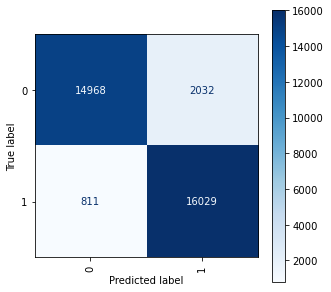

In [79]:
fig, ax = plt.subplots(figsize=(5, 5))
disp = plot_confusion_matrix(gb, X_test_nx, y_test_nx, cmap = plt.cm.Blues, ax = ax, xticks_rotation = 'vertical')
plt.show()

# Multi-layer Perceptron Classifier (Neural Network Classifier)

1. Uses GridSearchCV for hyperparameter tuning to pick best model version

In [87]:
mlp = MLPClassifier(random_state = 0, max_iter = 1000)
param_grid = {'activation': ['tanh','relu'], 'solver': ['sgd','adam']}
gs_mlp = GridSearchCV(mlp, param_grid = param_grid, scoring = 'accuracy')
gs_mlp.fit(X_train_nx, y_train_nx)
mlp = gs_mlp.best_estimator_
print(mlp)

MLPClassifier(max_iter=1000, random_state=0)


2. Fits model & makes predictions

In [88]:
mlp.fit(X_train_nx, y_train_nx)
y_pred_mlp = mlp.predict(X_test_nx)

3. Calculates Accuracy, Precision, Recall, F1 Score, Log-Loss, AUC-ROC

In [89]:
# Classification Report

print(classification_report(y_test_nx, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     17000
           1       0.88      0.96      0.92     16840

    accuracy                           0.92     33840
   macro avg       0.92      0.92      0.92     33840
weighted avg       0.92      0.92      0.92     33840



In [90]:
# Computes Accuracy, Precision, Recall, F1 Score, Log-Loss

accuracy.append(round(accuracy_score(y_test_nx, y_pred_mlp),2))
precision.append(round(precision_score(y_test_nx, y_pred_mlp, average = 'macro'),2))
recall.append(round(recall_score(y_test_nx, y_pred_mlp, average = 'macro'),2))
f1.append(round(f1_score(y_test_nx, y_pred_mlp, average = 'macro'),2))
mlp_probas = mlp.predict_proba(X_test_nx)
logloss.append(round(log_loss(y_test_nx, mlp_probas),2))

print('Accuracy: {}'.format(accuracy[-1]))
print('Precision: {}'.format(precision[-1]))
print('Recall: {}'.format(recall[-1])) 
print('F1-Score: {}'.format(f1[-1]))
print('Log Loss: {}'.format(logloss[-1]))

Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1-Score: 0.92
Log Loss: 0.24


In [91]:
# Computer AUC-ROC

mlp_probs = mlp.predict_proba(X_test_nx)[:,1]

fpr["Neural Network"], tpr["Neural Network"], _ = roc_curve(y_test_nx, mlp_probs)
roc_auc["Neural Network"] = auc(fpr["Neural Network"], tpr["Neural Network"])                           

print('Neural Network ROC Curve Area {0:.2f}'.format(roc_auc['Neural Network']))

Neural Network ROC Curve Area 0.95


4. Prints Confusion Matrix

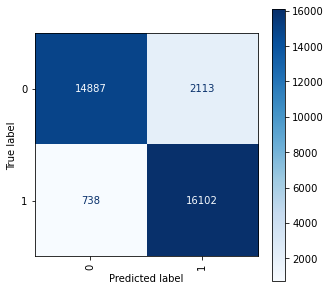

In [92]:
fig, ax = plt.subplots(figsize=(5, 5))
disp = plot_confusion_matrix(mlp, X_test_nx, y_test_nx, cmap = plt.cm.Blues, ax = ax, xticks_rotation = 'vertical')
plt.show()

# Model Comparison

1. Compares models accuracies: Creates 5 bar plots for each of the metrics of accuracy, precision, recall, F1-score, log-loss metrics for each of the 4 models

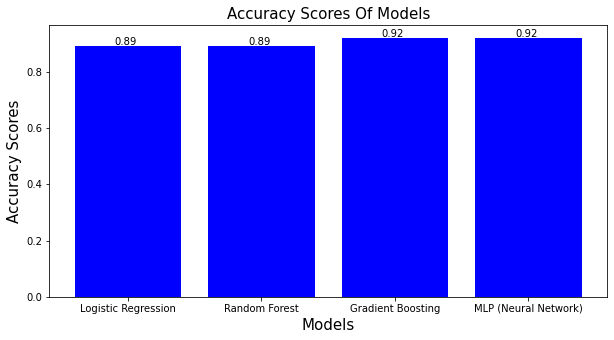

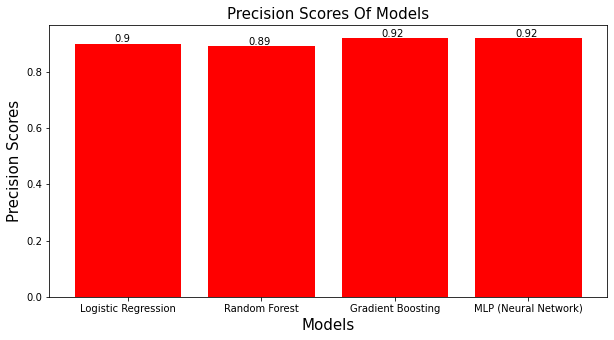

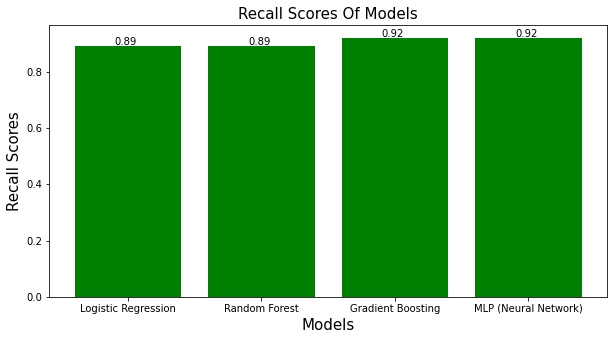

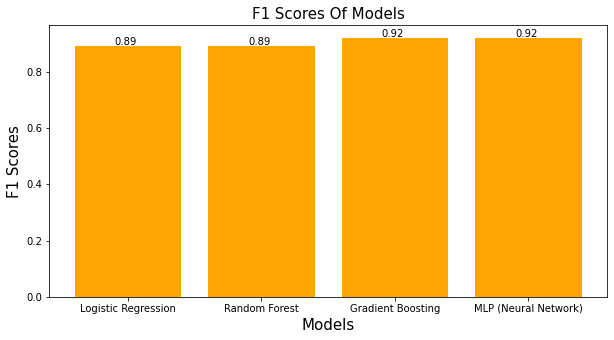

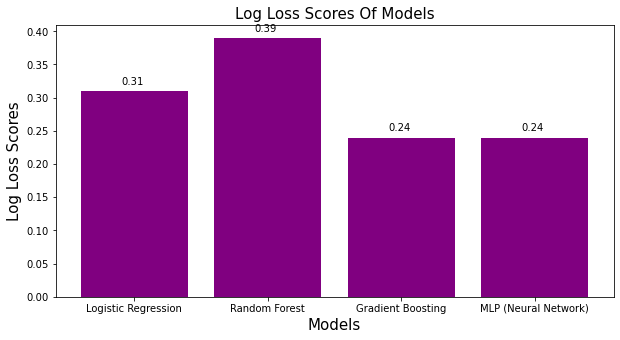

In [93]:
labels = ['Logistic Regression','Random Forest','Gradient Boosting', 'MLP (Neural Network)']

# Plotting Accuracy Scores
plt.figure(figsize = (10,5))
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Accuracy Scores', fontsize = 15)
plt.title('Accuracy Scores Of Models', fontsize = 15)

bars = plt.bar(labels, accuracy, color = 'blue')
for bar in bars:
    plt.text(bar.get_x() + 0.3, bar.get_height() + 0.005, bar.get_height())
plt.show()

# Plotting Precision Scores
plt.figure(figsize = (10,5))
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Precision Scores', fontsize = 15)
plt.title('Precision Scores Of Models', fontsize = 15)

bars = plt.bar(labels, precision, color = 'red')
for bar in bars:
    plt.text(bar.get_x() + 0.3, bar.get_height() + 0.005, bar.get_height())
plt.show()

# Plotting Recall Scores
plt.figure(figsize = (10,5))
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Recall Scores', fontsize = 15)
plt.title('Recall Scores Of Models', fontsize = 15)

bars = plt.bar(labels, recall, color = 'green')
for bar in bars:
    plt.text(bar.get_x() + 0.3, bar.get_height() + 0.005, bar.get_height())
plt.show()

# Plotting F1 Scores
plt.figure(figsize = (10,5))
plt.xlabel('Models', fontsize = 15)
plt.ylabel('F1 Scores', fontsize = 15)
plt.title('F1 Scores Of Models', fontsize = 15)

bars = plt.bar(labels, f1, color = 'orange')
for bar in bars:
    plt.text(bar.get_x() + 0.3, bar.get_height() + 0.005, bar.get_height())
plt.show()

# Plotting Log Loss Scores
plt.figure(figsize = (10,5))
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Log Loss Scores', fontsize = 15)
plt.title('Log Loss Scores Of Models', fontsize = 15)

bars = plt.bar(labels, logloss, color = 'purple')
for bar in bars: 
    plt.text(bar.get_x() + 0.3, bar.get_height() + 0.01, bar.get_height())
plt.show()

2. Compares models AUC-ROC

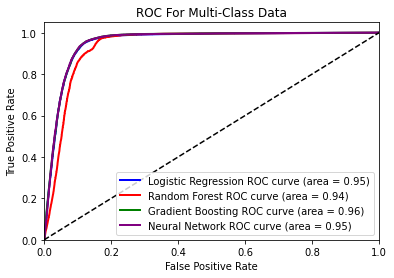

In [94]:
for fp, tp, color, roc in zip(fpr, tpr, colors, roc_auc): 
    plt.plot(fpr[fp], tpr[tp], color = color, lw = 2, label = '{0} ROC curve (area = {1:0.2f})'.format(roc, roc_auc[roc]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC For Multi-Class Data')
plt.legend(loc = "lower right")
plt.show()

# Facebook Friend Recommender

In [98]:
# Gets probabilites for each unconnected pair that includes the user requested user # and prints the top k as requested by user

def recommend_friends_nx():
    
    df = []
    
    # Prompts the user for user to recommend friends for
    while True: 
        
        num = input(f'Please enter the user (0-4038) to get friend recommendations for:\n')
        try: int(num)
        except ValueError: continue
        num = int(num)
        if not (num >= 0 and num < len(G.nodes)): continue
        else: break
    
    df = final_df_nx_scaled[(final_df_nx_scaled.loc[:,'Connected'] == 0) & ((final_df_nx_scaled.loc[:,'Node 1'] == num) | (final_df_nx_scaled.loc[:,'Node 2'] == num))]
    
    # Prompts the user for how many recommmendations they want
    while True:
        k = input(f'Please enter the k number of friend recommendations out of {len(df)} that you would like to recieve:\n')
        try: int(k)
        except ValueError: continue
        k = int(k)
        if not (k > 0 and k <= len(df)): continue
        else: break
       
    # Finds the top most likely unconnected node future links and their probabilities of linking to the specific user specified
    features = []
    columns = ['Common Neighbors', 'Jaccard Coefficient','Resource Allocation Index','Adamic Adar Index', 'Preferential Attachment']
    features = df[columns]
    features = np.array(features) 
    
    top_k_indices = np.flip(np.argsort(mlp.predict_proba(features)[:,1]))[0:k]
    
    rec_friends, node = {}, ''
    
    # Stores the user values and probabilites in a dictionary
    for i in top_k_indices:
        
        if df.iloc[i]['Node 1'] != num: node = 'Node 1'
        else: node = 'Node 2'
    
        rec_friends[df.iloc[i][node]] = round(mlp.predict_proba(features)[:,1][i] * 100,2)
    
    # Prints the most likely future recommended friends
    print(f'Friend recommendations for user {num} are:\n')
    for u,p in rec_friends.items():
        print(f'User: {u} at {p}% chance of a future link')

In [104]:
recommend_friends_nx()

Please enter the user (0-4038) to get friend recommendations for:
65
Please enter the k number of friend recommendations out of 22 that you would like to recieve:
22
Friend recommendations for user 65 are:

User: 56.0 at 81.09% chance of a future link
User: 325.0 at 74.75% chance of a future link
User: 315.0 at 63.15% chance of a future link
User: 168.0 at 51.07% chance of a future link
User: 55.0 at 35.69% chance of a future link
User: 221.0 at 5.89% chance of a future link
User: 73.0 at 5.85% chance of a future link
User: 3.0 at 5.69% chance of a future link
User: 216.0 at 1.55% chance of a future link
User: 234.0 at 1.55% chance of a future link
User: 81.0 at 1.49% chance of a future link
User: 229.0 at 1.35% chance of a future link
User: 6.0 at 1.35% chance of a future link
User: 167.0 at 1.32% chance of a future link
User: 93.0 at 1.28% chance of a future link
User: 195.0 at 1.26% chance of a future link
User: 139.0 at 1.26% chance of a future link
User: 177.0 at 1.21% chance of a

In [100]:
# Saves models to pickle file

file = open('./Pickle Files/NetworkX_Models.pickle','wb')
pickle.dump(lr, file)
pickle.dump(rf, file)
pickle.dump(gb, file)
pickle.dump(mlp, file)